# Sommaire
- Description des données
- Architecture proposée
- Résultats
- Conclusion

# Description des données
Les données étudiées sont réunies au sein du fichier ```Mask_Data-20220329T101350Z-001.zip``` contenant des fichiers images de différents formats répartis dans les 2 dossiers suivants :
- with_mask qui contient un ensemble d'image de personnes portant un masque, naturellement ou après ajout d'un filtre.
- without_mask, qui contient un ensemble d'image de personnes sans masque.

Malgré les nombreux formats pris en charge par Tensorflow, il a été jugé judicieux de tester la prise en charge des photos composant le dataset. Pour ce faire, le script ```image_type_check.py``` peut-être exécuté afin de mettre en évidence les fichiers pouvant poser problème lors de l'utilisation de la librairie.

Afin de s'assurer du bon traitement des images lors de l'entraînement du modèle CNN, il faut redimensionner les données afin qu'elles correspondent aux dimensions attendues par ce modèle, c'est-à-dire en ```244×244```.

Les données ont ensuite été divisées en 3 datasets différents :

- ```_train``` : les données d'entraînement du modèle convolutionnel - 80%
- ```_val``` : les données de validation lors des différents lors des différents apprentissages - 10%
- ```_test``` : les données permettant de tester la robustesse du modèle - 10%

Enfin, afin d'augmenter significativement les performances du modèles, un filtre générateur est appliqué aux données retenues pour la phase d'entraînement pour générer de nombreuses images légèrement modifiées, à l'aide notamment :

- d'une rotation
- d'un élargissement/agrandissement
- d'un zoom
- d'une symétrie selon un axe vertical

# Architecture proposée

L'architecture retenue permet de mettre en oeuvre la technique de transfer learning dans un réseau convolutionnel, suivant les étapes décrites ci-dessous :

- ```normalization_layer```, une couche s'assurant du redimensionnement des images à traîter avec le modèle
- ```cnn```, le modèle VGG16 composé de 
   - 2 ensembles de 2 couches convolutionnelles et d'un masque
   - 3 ensembles de 3 couches convolutionnelles et d'un masque
- une couche d'applanissement
- 2 couches de densification des sorties

Les couches du modèle VGG16, représentées ci-dessous, sont gelées afin de préserver la propriété de reconnaissance des formes du modèle initial, auxquelles on ajoute des couches permettant de classifier les images suivant les classes souhaitées, c'est-à-dire ```with_mask``` ou ```without_mask```.

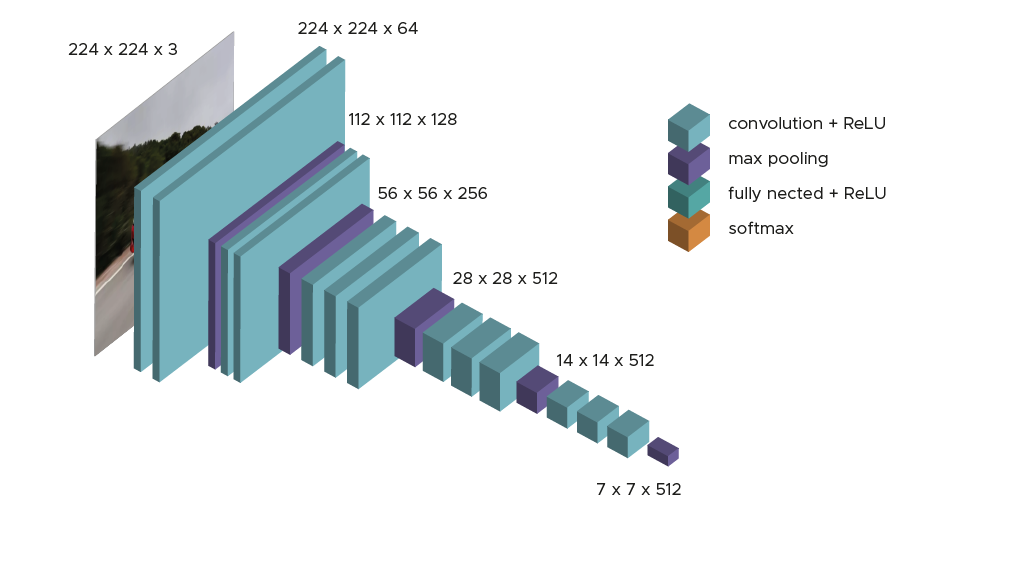

# Résultats

Suite à un premier essai mettant en évidence l'incapacité du modèle initial à classifier correctement les images du dataset (précision de 50,67%), le premier apprentissage permet d'obtenir une précision de près de 73% et les suivants jusqu'à 90% sur les données de validation, tel que représenté ci-dessous : 

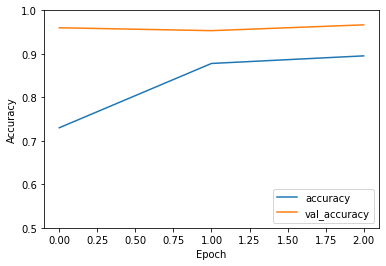

Avant de valider le modèle final, la précision de celui-ci est mesuré à l'aide d'une matrice de confusion ci-dessous, permettant de confirmer la robustesse du modèle sur les images du dataset initial.
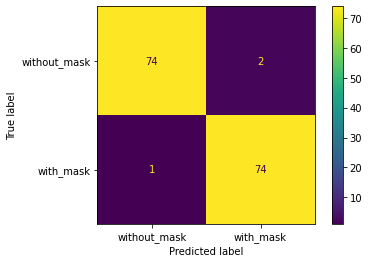

# Conclusion

On vient ainsi de mettre en pratique la technique de transfert learning afin d'adapter un modèle de reconnaissance d'images à un problème de classification donné. En effet, le modèle final permet de reconnaître la présence d'un masque à près de 90% de précision.

Ce résultat est à nuancé selon moi au regarde des 2 points suivants :

- la qualité du dataset initial, qui comporte de nombreuses images dupliquées et sur lesquelles a souvent été rajouté artificiellement le même masque, introduisant de facto un biai
- la trop grande détection de masque lors de la mise en application à la détection sur un flux vidéo ; que ce soit sur un pull ou au plafond, le modèle semble reconnaître la présence de masques sur des grandes surfaces rectangulaires

Afin de remédier à ces deux problèmes, il serait utile de compléter le dataset inital avec des images plus diversifiées et analyser les images générées avant qu'elles soient traîtées par le modèle.